## Exploring Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import random, linalg
from random import randint
from mpl_toolkits.mplot3d import Axes3D 

In [66]:
color_iter = ['navy', 'cyan', 'cornflowerblue', 'gold','darkorange','red','blue','green']
def plot_data(X,y,n):
    plt.figure()
    
    for i in range(n):
        plt.scatter(X[y ==i,0], X[y == i,1], s=50, c=color_iter[i])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Gaussian Mixture Modeling")
    plt.show()      
    

#### Plot of 500 points from a 2D multivariate Gaussian mixture distribution.

In [2]:
csv = np.genfromtxt ('data.csv', delimiter=",")

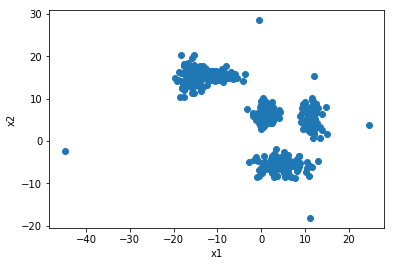

In [23]:
plt.scatter(csv[:,0],csv[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Clustering data using EM Gaussian Mixture Modeling.

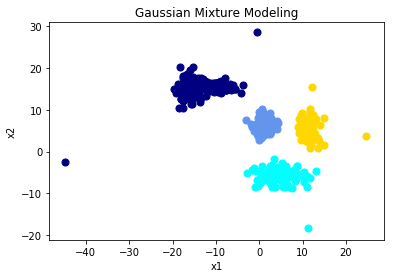

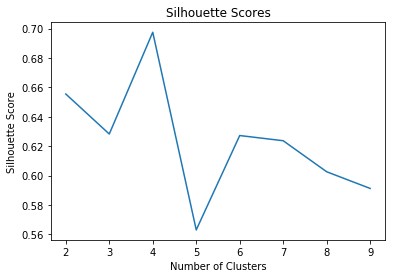

In [67]:
# Fit a Gaussian mixture with EM using five components
cluster_optimum = [0,0,0]
silhouette_scores = []
for i in range(2,10):
    gmm = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(csv)
    y_hc = gmm.predict(csv)
    silhouette_avg = silhouette_score(csv, y_hc)
    if silhouette_avg > cluster_optimum[0]:
        cluster_optimum[0] = silhouette_avg #Silhouette Score
        cluster_optimum[1] = y_hc #Cluster Labels
        cluster_optimum[2] = i #Number of clusters
    silhouette_scores.append(silhouette_avg)
plot_data(csv,cluster_optimum[1],cluster_optimum[2])
plt.figure()
plt.plot(np.arange(2,10),silhouette_scores)
plt.title("Silhouette Scores")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.show()

This clustering method uses an expectation-maximisation algorithm to determine a mix of multivariate gaussian distributions that encompass each cluster within the data. The optimal number of clusters was chosen by determining the number of clusters that corresponds to the maximum silhouette score. This clustering algorithm did not require the specification of a distance measure (unlike hierarchical agglomerative clustering) as at every stage of the EM algorithm the Gaussian mixture models are improved by maximising the log-likelihood of the parameters with respect to the data and cluster assignments. 

#### Mean and covariance matrix of each cluster.

In [68]:
for i in range(cluster_optimum[2]):
    print("Class: "+color_iter[i]+", Mean: "+str(csv[cluster_optimum[1]==i].mean(0)))

Class: navy, Mean: [-13.11757245  15.23685781]
Class: cyan, Mean: [ 4.69901615 -5.92801364]
Class: cornflowerblue, Mean: [ 0.96836835  6.13476449]
Class: gold, Mean: [ 11.69741868   5.6335456 ]


/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/Users/admin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [73]:
for i in range(cluster_optimum[2]):
    print("Class: "+color_iter[i]+", Covariance Matrix: \n"+str(np.cov(csv[cluster_optimum[1]==i].T)))

Class: navy, Covariance Matrix: 
[[ 18.78542229   4.55108775]
 [  4.55108775   4.80721121]]
Class: cyan, Covariance Matrix: 
[[ 9.72236214 -0.81057019]
 [-0.81057019  3.51119487]]
Class: cornflowerblue, Covariance Matrix: 
[[ 1.90548034  0.10009563]
 [ 0.10009563  2.03581834]]
Class: gold, Covariance Matrix: 
[[ 3.12739903 -0.64506433]
 [-0.64506433  5.79729072]]


The covariance matrix of a cluster is indicative of its shape. The (1,1) and (2,2) elements of the matrices represent the variance of '$x_1$' and '$x_2$' respectively, while elements (1,2) and (2,1) both show the covariance between $x_1$ and $x_2$. The individual variances of each feature determine the length and breatdth of a Gaussian elipse around a cluster, while the covariance of the features influence the orientation of the elipse relative to the coordinate axis.

#### Performance of model.

In [82]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(csv)
print("Average log-likelihood: "+ str(gmm.score_samples(csv).mean()))

Average log-likelihood: -5.91073022682


The average log-likelihood value corresponds to a small average probability of a data point's occurence given the optimal parameters however, this does not mean the model performs poorly. Comparing the covariance matrices and cluster means to the Gaussian distributions that generated the data might be another way to evaluate the performance of the model. With more data points, the model could be evaluated by randomly splitting the data into a test set and trianing set to see how well the parameters obtained by training a model on the training set perform on the test set. The performance can be evaluated by computing the average log-likelihood in both cases. A much more negative log-likelihood for the test set would indicate a poor, over-fitted model.

#### 3D Multivariate Gaussian distributions.

In [3]:
n = 2
means = []
cov_mat = []

# Generating random 3D multivariate Gaussians
# Changing n will enable samples of N 3D multivariate gaussian distributions to be drawn.
for i in range(n):
    A = np.random.rand(3,3) * 10
    S = np.dot(A,A.transpose()) * 10
    M = np.random.rand(3)
    cov_mat.append(S)
    means.append(M)

data = []
labels = []
# Sampling from n 3D multivariate Gaussians
for j in range(500):
    c = randint(0, n-1)
    data.append(np.random.multivariate_normal(means[c], cov_mat[c], 1)[0])
    labels.append(c)
data = np.array(data)
labels = np.array(labels)

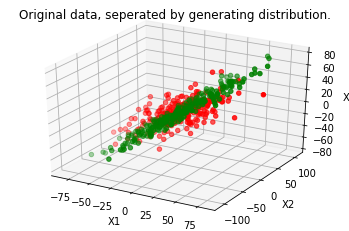

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[labels==0,0], data[labels==0,1], data[labels==0,2], c="red")
ax.scatter(data[labels==1,0], data[labels==1,1], data[labels==1,2], c="green")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title("Original data, seperated by generating distribution.")
plt.show()

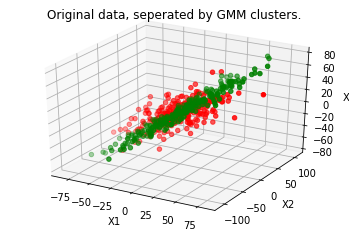

In [6]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(data)
y = gmm.predict(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[y ==0,0], data[y == 0,1], data[y == 0,2], c="red")
ax.scatter(data[y ==1,0], data[y == 1,1], data[y == 1,2], c="green")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title("Original data, seperated by GMM clusters.")
plt.show()

In [7]:
print("Class: green \n"+"Mean: "+str(data[y==0].mean(0)) +\
     "\nCovariance Matrix: \n"+str(np.cov(data[y==0].T))+\
     "\nOriginal Mean: " + str(means[0])\
     + "\nOriginal Covariance Matrix: \n"+ str(cov_mat[0]))
print("Class: red \n"+"Mean: "+str(data[y==1].mean(0)) +\
     "\nCovariance Matrix: \n"+str(np.cov(data[y==1].T))+\
     "\nOriginal Mean: " + str(means[1])\
     + "\nOriginal Covariance Matrix: \n"+ str(cov_mat[1]))


Class: green 
Mean: [-0.5979954  -0.64390668 -0.76592207]
Covariance Matrix: 
[[505.71060936 243.1041795  256.2547579 ]
 [243.1041795  244.27029682 264.34120907]
 [256.2547579  264.34120907 319.96671614]]
Original Mean: [0.56070507 0.12174174 0.65389481]
Original Covariance Matrix: 
[[595.91253307 313.33421949 319.54060057]
 [313.33421949 311.7562777  311.31663669]
 [319.54060057 311.31663669 351.96552046]]
Class: red 
Mean: [ 1.19518501 -0.08510656  1.68018693]
Covariance Matrix: 
[[ 881.44937447  581.11613152  864.90296309]
 [ 581.11613152 1331.35493509  720.52449261]
 [ 864.90296309  720.52449261  890.24389919]]
Original Mean: [0.2972633  0.98668963 0.54803008]
Original Covariance Matrix: 
[[ 770.60594644  517.87350845  760.5660319 ]
 [ 517.87350845 1353.44308254  676.61367105]
 [ 760.5660319   676.61367105  799.23234464]]


#### Evaluation

When choosing the clustering algorithm, it was assumed that the underlying distribution of the data was a mixture of multivariate Gaussians. Thus, choosing a Gaussian Mixture Model seemed the best way to create a model that would yield parameters close to those of the true underlying distribution. The algorithm might not perform as well if the data was generated from uniform or radial distributions. For example, pitfalls of the Gaussian mixture model could include Gaussian elipses that have large covariance matrices as they try to capture uniformly distributed points over a wide range. For data that was generated using a mixture of uniform distributions hierarchical agglomerative clustering could be an effective method to employ. This clustering method is initialised by considering every point as an individual cluster. In each successive stage of the algorithm, the two 'nearest' clusters are joined together to form a new cluster. In addition to the number of clusters, the algorithm also requires a distance measure (used to define closeness of clusters) to be defined by the user. The best choice of distance measure depends on the nature of the underlying data. For example, minimum variance clustering would be the most appropriate for closely packed clusters. For data generated using radial distributions, clustering based on a softmax sigmoidal function, on a set of inputs expanded through radial basis functions could be carried out.